# Introduction

**Aim of the project:**<br> This is an analysis of the Boston Housing Dataset. In it I will describe the dataset using descriptive statistics, conduct some inferential statistical analysis to determine whether there is a significnat difference in house prices between houses along the Charles river and those that are not. Finally I will create a neural network using keras to predict the median house price based on the other variables in the dataset.

**Background - what is the Boston Housing Dataset?:**<br>
The Boston Housing Dataset was originally published by Harrisson & Rubenfeld in 1978, in order to determine whether or not clean air had an impact on house prices in Boston.


## Part 1 - Describe

### Preliminary investigations:


In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as st
%matplotlib inline

In [2]:
#import Boston House Prices dataset from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
from sklearn.datasets import load_boston

In [3]:
#Assign variable 'boston' to the dataset
boston = load_boston()

In [4]:
#take a look at the dataset
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [5]:
#That doesn't look good! Lets create a pandas dataframe from this data
#create pandas dataframe
df = pd.DataFrame(boston.data, columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat'])

In [6]:
#We need to add the median value to the dataframe
df['MEDV'] = boston.target

<function matplotlib.pyplot.show(*args, **kw)>

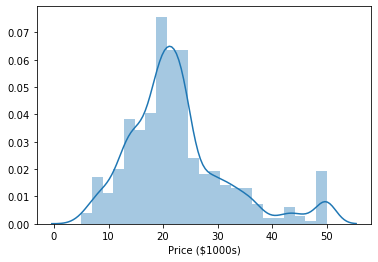

In [7]:
#plot medv values
sns.distplot(df['MEDV'])
plt.xlabel('Price ($1000s)')
plt.show

We can see from this plot that there is a disproportionate number of 'medv' values of 50. This is likely because when the data was being collected the values were in bands, with the highest being 50,000 and above. We will remove these as they skew the data.

In [41]:
df = df[df.MEDV !=50]

In [42]:

#We'll take a look at the first 20 rows
df.head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


## What do the headings mean?


In [43]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [44]:
#check for null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

No null values found.

The 'medv' variable is our target variable, as it reflects the price of the property.

<function matplotlib.pyplot.show(*args, **kw)>

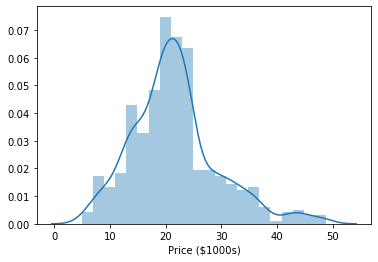

In [45]:
#plot medv values
sns.distplot(df['MEDV'])
plt.xlabel('Price ($1000s)')
plt.show


We can see from the above plot that the medv variable broadly follows a normal distribution, with some outliers. Next we'll look at correlations between the variables. A correlation $<=0.25$ or $>=-0.25$ is a weak correlation and will not help us with predictions. 

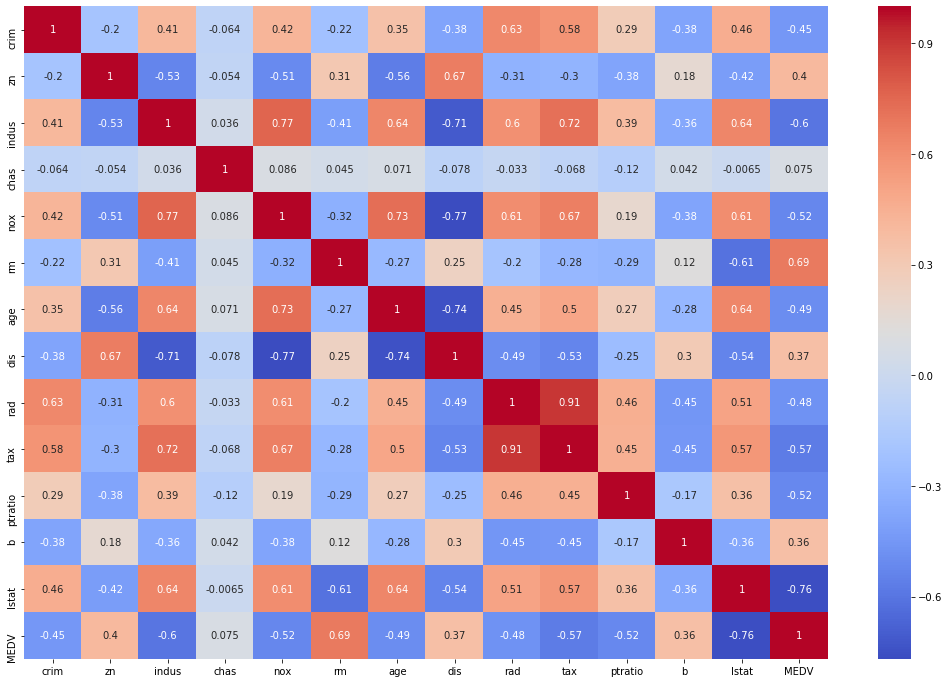

In [13]:
#show correlation between variables
ax, fig = plt.subplots(figsize = (18,12))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()
#blues show a negative correlation, oranges/reds a positive one

From the plot above we can see that the variable with the strongest positive correlation is no. of rooms, and the one with the strongest negative correlation is % of lower status of population. Intuitively it is reasonable that houses with more rooms would cost more, likewise it is a fair assumption that areas with a higher proportion of lower socio-economic residents would have lower prices housing on average. From this there doesn't appear to be a strong correlation between the 'CHAS' variable and house prices.

Finally in this section we'll take a look at the prices variable


In [14]:
prices = df['MEDV']
features = df.drop('MEDV', axis = 1)
prices.describe()
#features.describe()

count    490.000000
mean      21.635918
std        7.865301
min        5.000000
25%       16.700000
50%       20.900000
75%       24.675000
max       48.800000
Name: MEDV, dtype: float64

### Part 2 - Inferential Statistics

The aim of this section is to determine whether there is a significant difference in median prices of houses that are along the Charles river and those that are not. The Null Hypothesis will be that there is no difference between house prices whether or not they are along the Charles River. Lets take a look at the variable 'chas' which is the indicator as to whether the house lies along the river or not. '1' means it does, '0' means it does not.

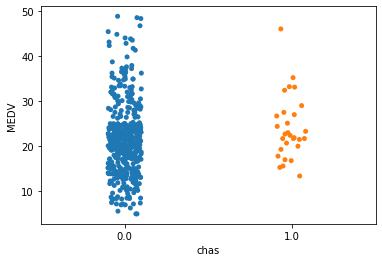

In [15]:
sns.stripplot(x="chas", y = 'MEDV', data = df)



From observing the scatterplot above we can see that there are much fewer properties bordering the Charles river than properties that don't border it; it also looks like the highest priced properties are away from the river.

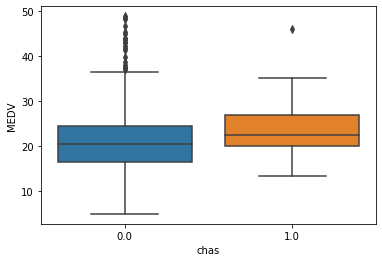

In [16]:
sns.boxplot(x = "chas", y = "MEDV", data = df)

From the boxplot above we can see that there are a lot of outliers in the properties not bordering the river, and the median price of houses bordering the river appears greater than that of houses not bordering it.
Our null hypothesis is that there is statistically no differenct between the median prices of houses that border the Charles River and those that dont'. Our alternative hypothesis is that there is a statistically significant difference between the median prices of houses that border the Charles river and those that don't. Lets seperate the variable into its components

In [60]:
#for col in df.columns:
    #print(col)
charles = df.drop(['crim','rm','dis','zn','indus','nox','age','rad','tax','ptratio','b','lstat'], axis =1)
#print(charles)





In [47]:
#group data in chas variable by 1 or 0, either bordering the river or not
group = charles.groupby('chas')
#look at this dataframe
group.describe().head()
#isolate medv


MEDV                                                   
      count       mean       std   min   25%   50%   75%   max
chas                                                          
0.0   461.0  21.488503  7.898848   5.0  16.5  20.6  24.5  48.8
1.0    29.0  23.979310  7.024161  13.4  20.0  22.4  27.0  46.0

In [58]:
notbound = charles[(charles['chas'] ==0.0)]
bound = charles[(charles['chas'] == 1.0)]
#notbound.reset_index(inplace= True)
#bound.reset_index(inplace= True)
print(bound)



     chas  MEDV
142   1.0  13.4
152   1.0  15.3
154   1.0  17.0
155   1.0  15.6
160   1.0  27.0
208   1.0  24.4
209   1.0  20.0
210   1.0  21.7
211   1.0  19.3
212   1.0  22.4
216   1.0  23.3
218   1.0  21.5
219   1.0  23.0
220   1.0  26.7
221   1.0  21.7
222   1.0  27.5
234   1.0  29.0
236   1.0  25.1
269   1.0  20.7
273   1.0  35.2
274   1.0  32.4
276   1.0  33.2
277   1.0  33.1
282   1.0  46.0
356   1.0  17.8
357   1.0  21.7
358   1.0  22.7
363   1.0  16.8
364   1.0  21.9


Perform the Levene test for equal variances. The Levene test tests the null hypothesis that all input samples are from populations with equal variances. If the p-value of Levene's test is less than some significance level (typically 0.05), the obtained differences in sample variances are unlikely to have occurred based on random sampling from a population with equal variances. Thus, the null hypothesis of equal variances is rejected and it is concluded that there is a difference between the variances in the population.

In [59]:
from scipy import stats
stats.levene(notbound['MEDV'], bound['MEDV'])

LeveneResult(statistic=0.6887118673011111, pvalue=0.40700864732277753)

The Pvalue is not significant meaning there is homogeneity of variances and we can proceed. Next we check the assumption of normality - the residuals should be normally distributed 

In [67]:
stats.ttest_ind(notbound['MEDV'], bound['MEDV'])

Ttest_indResult(statistic=-1.6571053443179937, pvalue=0.09814089320087695)

#### Interpretation:

A low pvalue indicates that the result of the t test didn't occur by chance. In this case the pvalue of 0.09 means that there is a 9% probability that the results happened by chance. 

### Part 3 - Predict

The aim of this section is to use keras to create a neural network that can predict the median house price based on other variables in the dataset. 

In [19]:
import tensorflow as tf
import keras as kr
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening.
import sklearn.decomposition as dec
# For preprocessing data.
import sklearn.preprocessing as pre
x = df[['crim', 'zn','indus', 'chas', 'nox', 'rm', 'age', 'dis','rad', 'tax', 'ptratio', 'b', 'lstat']]
y = df['MEDV']
x



Using TensorFlow backend.


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [20]:
y


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 490, dtype: float64

In [21]:
x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.2)

Building & training:

In [22]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(20, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
m.fit(x_train, y_train, epochs=100, batch_size=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
392/392 [==============================] - 0s 357us/step - loss: 4736.7172
Epoch 2/100
392/392 [==============================] - 0s 82us/step - loss: 1677.1905
Epoch 3/100
392/392 [==============================] - 0s 92us/step - loss: 804.8459
Epoch 4/100
392/392 [==============================] - 0s 102us/step - loss: 442.1754
Epoch 5/100
392/392 [==============================] - 0s 82us/step - loss: 285.7461
Epoch 6/100
392/392 [==============================] - 0s 92us/step - loss: 187.8854
Epoch 7/100
392/392 [==============================] - 0s 92us/step - loss: 138.9725
Epoch 8/100
392/392 [==============================] - 0s 92us/step - loss: 102.4602
Epoch 9/100
392/392 [==============================] - 0s 92us/step - loss: 80.4644
Epoch 10/100
392/392 [==============================] - 0s 92us/step - loss: 67.5383
Epoch 11/100
392/392 [==============================] - 0s 92us/step - loss: 59.5619
Epoch 12/100
3

392/392 [==============================] - 0s 92us/step - loss: 24.2948
Epoch 95/100
392/392 [==============================] - 0s 82us/step - loss: 23.6097
Epoch 96/100
392/392 [==============================] - 0s 92us/step - loss: 23.3548
Epoch 97/100
392/392 [==============================] - 0s 82us/step - loss: 23.5678
Epoch 98/100
392/392 [==============================] - 0s 82us/step - loss: 23.7604
Epoch 99/100
392/392 [==============================] - 0s 71us/step - loss: 22.9850
Epoch 100/100
392/392 [==============================] - 0s 71us/step - loss: 23.9230


In [24]:
m.predict(x_test).round().T

array([[21., 12., 22., 24., 13., 21.,  2., 28., 26., 27., 10., 27., 22.,
        31., 24., 25., 17., 27., 28., 20., 26., 25., 28., 20., 29., 22.,
        29., 29., 20., 30., 13., 10., 27., 29., 20., 23., 25., 25., 26.,
        14., 24., 24., 27., 10., 19., 31., 32., 24., 10., 30., 19., 34.,
        28., 25., 13., 24., 21., 26., 25.,  8., 26., 15., 23., 24., 11.,
        18., 25., 24., 30., 21., 22., 12., 27., 22., 20., 29., 35., 15.,
        23., 25., 28., 15., 24., 26., 21., 15., 18., 14., 15., 17., 28.,
        27., 18., 26., 17., 10., 23., 18.]], dtype=float32)

In [25]:
y_test.as_matrix().astype(np.float32)

C:\Users\pemtc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([19.3, 18.6, 20.5, 21.1, 14.4, 27.9, 13.2, 29.8, 20.7, 22.8, 17.8,
       22. , 18.8, 37.2, 22.9, 18.5, 18.3, 18.7, 24.8, 14.2, 37. , 22.8,
       22.1, 22.5, 24.8, 22.4, 22.2, 23.2, 19.5, 32.2, 17.4, 10.4, 21.6,
       24.1, 20. , 16. , 24.7, 29.6, 21. , 13.9, 23.3, 24. , 23. , 10.5,
       16.1, 41.7, 46. , 19.3, 15.6, 32.9, 16.2, 27.9, 36.2, 30.7, 17.2,
       21.2, 15.2, 21.6, 30.3,  8.8, 26.6, 14. , 22.7, 20.5, 23.8, 19.6,
       22. , 24.3, 43.1, 19.6, 21.2,  5.6, 20.6, 16.8, 20.3, 23.6, 28.5,
        9.6, 24.5, 19.4, 33.2, 20.2, 18.6, 23.7, 29.8, 19. , 19.9, 13.4,
       12.3, 11.5, 31. , 31.6, 20.6, 20.4, 11.7, 15.6, 20.2, 14.9],
      dtype=float32)

In [26]:
m.evaluate(x_test, y_test)

98/98 [==============================] - 0s 285us/step


26.456809725080216

It is good practice to normalise the data, as the values all have different ranges. For each feature we subtract the mean and divide by the standard deviation of the feature so that the feature is centered around zero. We can do this with keras: 

In [27]:
scaler = pre.StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)
print(x_test_scaled)

[[-0.29761017 -0.52519729 -0.06177574 ... -0.16424284  0.43049179
   0.1716629 ]
 [-0.29064436 -0.52519729 -0.28025091 ...  1.18432403 -3.0085447
  -0.30524382]
 [-0.30190327 -0.52519729  2.29474266 ...  0.4012852   0.28668923
   0.86301761]
 ...
 [-0.13090413 -0.52519729  1.38016039 ... -1.5128097  -1.95259857
   0.65817177]
 [ 0.17311221 -0.52519729  1.15716504 ...  0.87980893  0.45537038
  -0.35965599]
 [ 0.33324966 -0.52519729  1.15716504 ...  0.87980893 -0.84871826
   0.59095673]]


In [28]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(64, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam", metrics = ["accuracy"])

In [29]:
m.fit(x_train_scaled, y_train, epochs=100, batch_size=10)

Epoch 1/100
392/392 [==============================] - 0s 724us/step - loss: 501.9150 - accuracy: 0.0000e+00
Epoch 2/100
392/392 [==============================] - 0s 183us/step - loss: 445.1272 - accuracy: 0.0026
Epoch 3/100
392/392 [==============================] - 0s 194us/step - loss: 376.8623 - accuracy: 0.0026
Epoch 4/100
392/392 [==============================] - 0s 132us/step - loss: 296.9461 - accuracy: 0.0000e+00
Epoch 5/100
392/392 [==============================] - 0s 92us/step - loss: 213.0736 - accuracy: 0.0000e+00
Epoch 6/100
392/392 [==============================] - 0s 92us/step - loss: 142.7832 - accuracy: 0.0051
Epoch 7/100
392/392 [==============================] - 0s 92us/step - loss: 94.2903 - accuracy: 0.0026
Epoch 8/100
392/392 [==============================] - 0s 92us/step - loss: 65.2801 - accuracy: 0.0077
Epoch 9/100
392/392 [==============================] - 0s 92us/step - loss: 48.4313 - accuracy: 0.0026
Epoch 10/100
392/392 [=============================

392/392 [==============================] - 0s 82us/step - loss: 5.4066 - accuracy: 0.0255
Epoch 81/100
392/392 [==============================] - 0s 82us/step - loss: 5.4236 - accuracy: 0.0255
Epoch 82/100
392/392 [==============================] - 0s 82us/step - loss: 5.3995 - accuracy: 0.0230
Epoch 83/100
392/392 [==============================] - 0s 82us/step - loss: 5.3564 - accuracy: 0.0230
Epoch 84/100
392/392 [==============================] - 0s 82us/step - loss: 5.3143 - accuracy: 0.0255
Epoch 85/100
392/392 [==============================] - 0s 82us/step - loss: 5.2942 - accuracy: 0.0255
Epoch 86/100
392/392 [==============================] - 0s 92us/step - loss: 5.2312 - accuracy: 0.0255
Epoch 87/100
392/392 [==============================] - 0s 92us/step - loss: 5.2472 - accuracy: 0.0179
Epoch 88/100
392/392 [==============================] - 0s 153us/step - loss: 5.1652 - accuracy: 0.0281
Epoch 89/100
392/392 [==============================] - 0s 183us/step - loss: 5.1917 

In [30]:
#x_test_scaled = scaler.transform(x_test)
m.predict(x_test_scaled).round().T

array([[17., 13., 18., 19., 19., 21., 12., 27., 22., 22., 12., 25., 18.,
        34., 17., 19., 15., 20., 24., 19., 30., 24., 24., 18., 28., 21.,
        21., 22., 17., 34., 19.,  9., 21., 22., 19., 14., 25., 23., 22.,
        14., 25., 21., 23., 12., 17., 48., 39., 21., 14., 33., 15., 31.,
        25., 30., 14., 21., 16., 22., 33., 10., 32., 13., 20., 16., 19.,
        18., 26., 18., 40., 24., 19.,  8., 21., 17., 17., 30., 34., 14.,
        19., 19., 37., 15., 19., 25., 26., 16., 21., 11., 13., 15., 35.,
        32., 23., 18., 17., 15., 24., 18.]], dtype=float32)

In [31]:
y_test.as_matrix().astype(np.float32)

C:\Users\pemtc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([19.3, 18.6, 20.5, 21.1, 14.4, 27.9, 13.2, 29.8, 20.7, 22.8, 17.8,
       22. , 18.8, 37.2, 22.9, 18.5, 18.3, 18.7, 24.8, 14.2, 37. , 22.8,
       22.1, 22.5, 24.8, 22.4, 22.2, 23.2, 19.5, 32.2, 17.4, 10.4, 21.6,
       24.1, 20. , 16. , 24.7, 29.6, 21. , 13.9, 23.3, 24. , 23. , 10.5,
       16.1, 41.7, 46. , 19.3, 15.6, 32.9, 16.2, 27.9, 36.2, 30.7, 17.2,
       21.2, 15.2, 21.6, 30.3,  8.8, 26.6, 14. , 22.7, 20.5, 23.8, 19.6,
       22. , 24.3, 43.1, 19.6, 21.2,  5.6, 20.6, 16.8, 20.3, 23.6, 28.5,
        9.6, 24.5, 19.4, 33.2, 20.2, 18.6, 23.7, 29.8, 19. , 19.9, 13.4,
       12.3, 11.5, 31. , 31.6, 20.6, 20.4, 11.7, 15.6, 20.2, 14.9],
      dtype=float32)

In [32]:
m.evaluate(x_test_scaled, y_test)

98/98 [==============================] - 0s 693us/step


[11.395763883785326, 0.010204081423580647]

In [33]:
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(x_train)
pca.fit(x_test)
x_train_white = pd.DataFrame(pca.transform(x_train), columns=x.columns)
x_train_white

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,1.882258,-1.124787,-0.365682,-0.281802,-1.584082,2.324621,-2.036402,-5.806090,2.902142,0.068908,1.544725,0.514011,-2.701181
1,2.250366,2.904914,0.247908,-0.215740,-0.144449,0.549735,1.287299,0.794282,-0.345036,-0.181619,0.391196,-0.309873,-0.491724
2,0.040600,-0.578059,-1.186758,-0.798912,-0.151656,2.439293,-0.389841,-1.489693,-1.618288,0.213199,0.169221,-0.345866,2.660454
3,-1.025533,0.067041,0.927295,1.515151,0.462955,0.547874,-0.540138,0.832791,-0.197151,-1.332645,0.031261,-0.399522,0.537848
4,2.226426,2.772574,0.632595,0.421738,2.003391,-0.808169,-0.343577,0.462935,0.143991,-0.207009,-0.355005,-0.321988,-0.337635
5,-0.676243,-0.106511,-1.426063,-0.946549,-0.085596,1.270226,1.214732,0.083911,0.177807,0.573947,-0.691176,4.112026,-1.685918
6,-0.688833,-0.052564,-0.638498,0.301764,0.025556,-0.759037,1.149081,-1.314086,0.284798,-0.654773,-0.354096,-0.009919,-1.066375
7,2.184023,2.498013,0.200830,-0.177128,-0.598442,0.543719,1.271110,0.861305,-0.380661,-0.191722,1.779133,-0.384186,0.927651
8,-0.081532,-0.500532,-0.451102,0.407150,-0.330918,-1.130126,-0.243091,-1.341947,1.967840,-1.244832,1.144700,0.023660,-0.011960
9,-0.871487,-0.007979,-0.201830,1.143732,0.238027,-0.299281,0.653036,-0.271178,0.140547,-0.004145,0.407425,-0.238509,-0.024813


In [34]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(13, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))


m.compile(loss="mean_squared_error", optimizer="adam", metrics = ["accuracy"])

In [35]:
history = m.fit(x_train_white, y_train, epochs=30, batch_size=10)

Epoch 1/30
392/392 [==============================] - 0s 306us/step - loss: 520.6698 - accuracy: 0.0000e+00
Epoch 2/30
392/392 [==============================] - 0s 102us/step - loss: 503.4676 - accuracy: 0.0000e+00
Epoch 3/30
392/392 [==============================] - 0s 102us/step - loss: 486.5789 - accuracy: 0.0000e+00
Epoch 4/30
392/392 [==============================] - 0s 102us/step - loss: 469.0775 - accuracy: 0.0000e+00
Epoch 5/30
392/392 [==============================] - 0s 92us/step - loss: 450.3502 - accuracy: 0.0000e+00
Epoch 6/30
392/392 [==============================] - 0s 92us/step - loss: 430.4921 - accuracy: 0.0026
Epoch 7/30
392/392 [==============================] - 0s 92us/step - loss: 409.0940 - accuracy: 0.0000e+00
Epoch 8/30
392/392 [==============================] - 0s 92us/step - loss: 386.3062 - accuracy: 0.0000e+00
Epoch 9/30
392/392 [==============================] - 0s 102us/step - loss: 362.6012 - accuracy: 0.0000e+00
Epoch 10/30
392/392 [===============

In [36]:
#scaler.fit(x_test)
x_test_white = scaler.transform(x_test)
m.predict(x_test_white).round().T

array([[20., 24., 27., 22., 27., 14., 24., 10., 32., 13., 18., 13., 28.,
        14., 15., 26., 17., 26., 20., 15.,  8., 32., 21., 24.,  7., 37.,
        15., 15., 23.,  8., 16.,  2., 19., 11., 12., 17., 28., 20., 26.,
        28., 11., 18., 29., 14., 32.,  4., 15., 29., 32.,  8., 26., 13.,
        21.,  5., 18., 25., 21., 20.,  4., 10., 24., 21., 27., 16., 18.,
        17.,  7., 21.,  5., 13., 16., 11., 23., 18., 24., 13., 12., 20.,
        16., 20., 10., 33., 20., 20., 10., 23., 18., 19., 16., 15.,  6.,
         9., 18., 26., 24., 18., 11., 14.]], dtype=float32)

In [37]:
y_test.as_matrix().astype(np.float32)

C:\Users\pemtc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([19.3, 18.6, 20.5, 21.1, 14.4, 27.9, 13.2, 29.8, 20.7, 22.8, 17.8,
       22. , 18.8, 37.2, 22.9, 18.5, 18.3, 18.7, 24.8, 14.2, 37. , 22.8,
       22.1, 22.5, 24.8, 22.4, 22.2, 23.2, 19.5, 32.2, 17.4, 10.4, 21.6,
       24.1, 20. , 16. , 24.7, 29.6, 21. , 13.9, 23.3, 24. , 23. , 10.5,
       16.1, 41.7, 46. , 19.3, 15.6, 32.9, 16.2, 27.9, 36.2, 30.7, 17.2,
       21.2, 15.2, 21.6, 30.3,  8.8, 26.6, 14. , 22.7, 20.5, 23.8, 19.6,
       22. , 24.3, 43.1, 19.6, 21.2,  5.6, 20.6, 16.8, 20.3, 23.6, 28.5,
        9.6, 24.5, 19.4, 33.2, 20.2, 18.6, 23.7, 29.8, 19. , 19.9, 13.4,
       12.3, 11.5, 31. , 31.6, 20.6, 20.4, 11.7, 15.6, 20.2, 14.9],
      dtype=float32)

In [38]:
m.evaluate(x_test_white, y_test)

98/98 [==============================] - 0s 326us/step


[161.3124557806521, 0.0]

In [39]:
print(history.history.keys())


dict_keys(['loss', 'accuracy'])


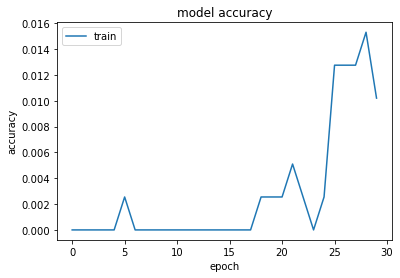

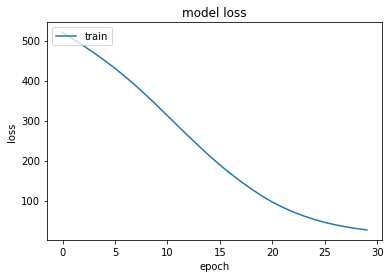

In [40]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### References:

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 <br> https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html <br>
Chollet, F. 2018 *Deep Learning With Python*, Manning Publication Co., NY <br>
https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/<br>
Harrison Jr, David, & Rubenfeld, Daniel, 1978, '*Hedonic Housing Prices and the Demand for Clean Air*', Journal of Environmental Economics & Management 5, 81-102 <br>
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html <br>
https://pythonfordatascience.org/independent-t-test-python/ <br>